Import numpy, pandas, matplotlib.pyplot and seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb  # or sns
%matplotlib inline

Run the following cell to ignore warnings.

In [2]:
import warnings
warnings.filterwarnings("ignore")

Import the "fruit.csv" file into a DataFrame called fruit.<br>
Set the index to column 0.<br>
Display the fruit DataFrame.

In [3]:
fruit = pd.read_csv("fruit.csv", index_col=0)
fruit

,Weight,Volume,Type
0,125.858142,150.073191,Apple
1,126.349007,149.545374,Apple
2,114.910669,208.031405,Apple
3,125.560725,198.451386,Apple
4,128.774059,159.483184,Apple
...,...,...,...
995,221.092550,221.271868,Orange
996,182.222555,199.993081,Orange
997,164.744415,255.303100,Orange
998,213.896346,207.875747,Orange


Use matplotlib plot function to plot x=Volume vs. y=Weight of ALL the data.<br>
Use marker style "bo".<br>
Label your axes and title the chart: Apples vs. Oranges.

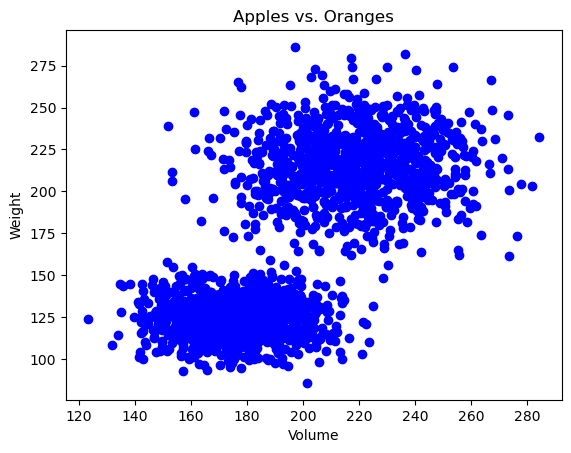

In [4]:
plt.plot(fruit["Volume"], fruit["Weight"], "o", color="blue")
plt.xlabel("Volume")
plt.ylabel("Weight")
plt.title("Apples vs. Oranges")
plt.show()

Text(0.5, 1.0, 'Apples vs. Oranges')

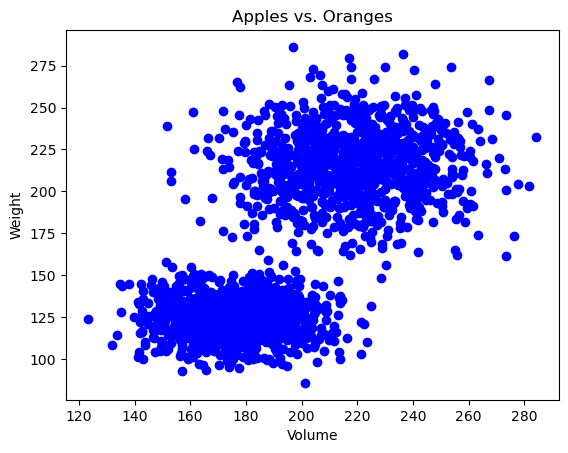

In [5]:
fig = plt.figure()
axes = fig.add_axes([0,0,0.77,0.77])
axes.plot(fruit["Volume"], fruit["Weight"], "o", color="blue")
axes.set_xlabel("Volume")
axes.set_ylabel("Weight")
axes.set_title("Apples vs. Oranges")

Practice your pandas data selection and make two plots on the same canvas:<br>
1. Weight vs. Volume of ONLY Apples, use blue for the marker color.<br>
2. Weight vs. Volume of ONLY Oranges, use red for the marker color.<br>
Add labels, title and a legend.

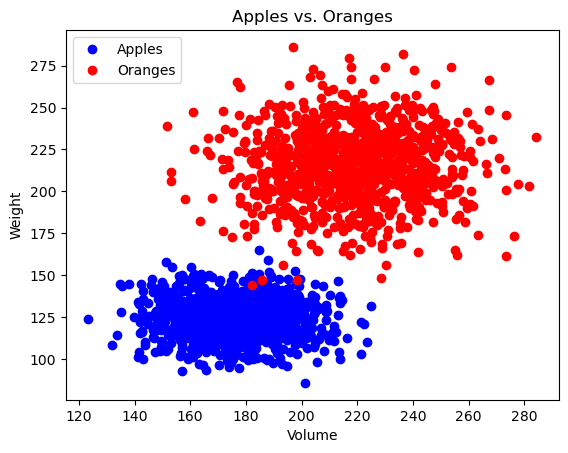

In [6]:
fig = plt.figure()
axes = fig.add_axes([0,0,0.77,0.77])
axes.plot(fruit[fruit["Type"]=="Apple"]["Volume"], 
          fruit[fruit["Type"]=="Apple"]["Weight"],
          "o", color="b", label="Apples")
axes.plot(fruit[fruit["Type"]=="Orange"]["Volume"], 
          fruit[fruit["Type"]=="Orange"]["Weight"],
          "o", color="r", label="Oranges")
axes.set_xlabel("Volume")
axes.set_ylabel("Weight")
axes.set_title("Apples vs. Oranges")
axes.legend()

Use seaborn to create a scatterplot of ALL the data.<br>
x=Volume<br>
y=Weight

<Axes: xlabel='Volume', ylabel='Weight'>

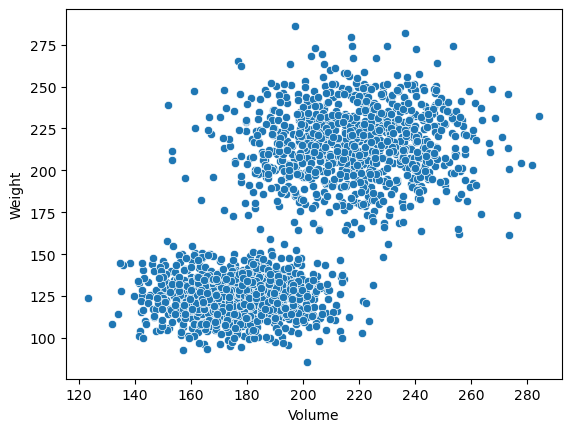

In [7]:
sb.scatterplot(data=fruit, x="Volume", y="Weight")

Let us find the centroids of the clusters (the mean x- and y- values for each type of fruit). Calculate the mean values of volume and weight for the apples, and for the oranges. Store the volumes in a list called 'x'; store the weights in a list called 'y'. Some of the code has been done for you, but you need to add more to the cell below.

In [8]:
apple = fruit[fruit["Type"]=="Apple"][["Volume", "Weight"]].mean()
orange = fruit[fruit["Type"]=="Orange"][["Volume", "Weight"]].mean()
x, y = [apple["Volume"], orange["Volume"]], [apple["Weight"], orange["Weight"]]
print(x)
print(y)

[175.69094274956257, 218.314817041545]
[124.87771028116657, 215.5033868468237]


Create a scatter plot of all the data. Use the hue option to color the data by type of fruit. Plot the x and y lists created above on top of this plot, using a cyan star of size '200'.

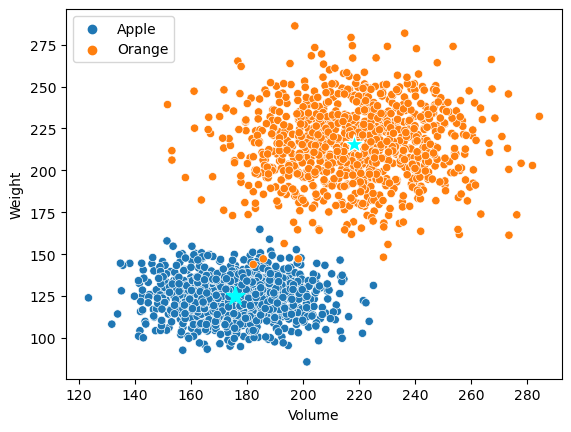

In [13]:
fig = plt.figure()
scatter = sb.scatterplot(
                         data=fruit, 
                         x="Volume", 
                         y="Weight", 
                         hue="Type"
                        ).legend_.set_title('')
plt.scatter(
         apple["Volume"], 
         apple["Weight"],
         s=200,
         # markersize=15,         # Asked for a 200 size
         marker="*",
         color="cyan",  
         # markeredgecolor="white",
        )
plt.plot(
         orange["Volume"], 
         orange["Weight"],
         markersize=15,
         marker="*",
         color="cyan",
         markeredgecolor="white"
        )

How balanced is the data? Use seaborn to produce barplot showing the count of apples and oranges.

<Axes: xlabel='Type', ylabel='count'>

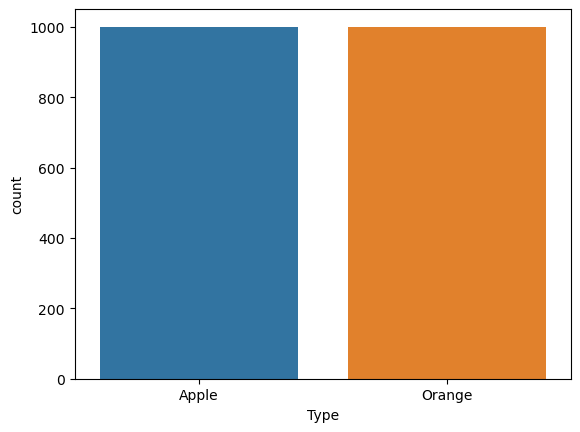

In [14]:
sb.countplot(fruit, x="Type")

Use seaborn to create a jointplot of only the apple data.

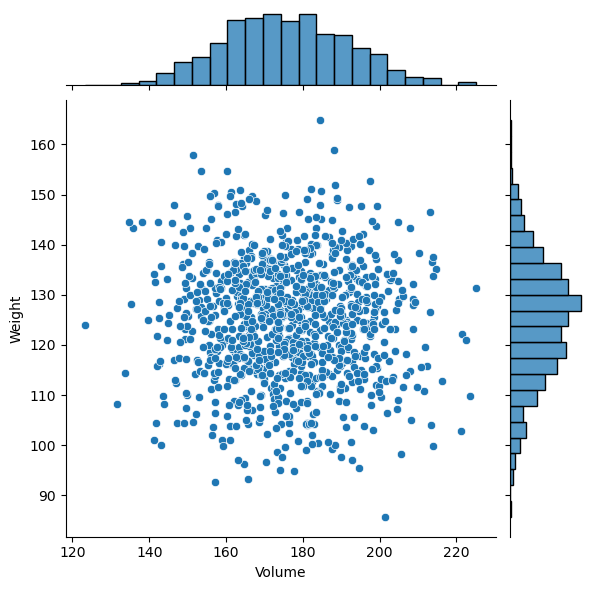

In [15]:
sb.jointplot(fruit[fruit["Type"]=="Apple"], x="Volume", y="Weight")

Does the apple weight data in a normal distribution? How about the volume?<br>
Watch the video, then write your answer in the markdown cell below.<br>
https://www.youtube.com/watch?v=DJzmb7hGmeM

**Answer:** Yes, because we can see that volume and weight are distributed in the graph with most values in the middle, meaning that we have a normal distribution.

Let's look at it one more way.<br>
Use seaborn distplots to visualize the distributions of the weight and volume of the apples.

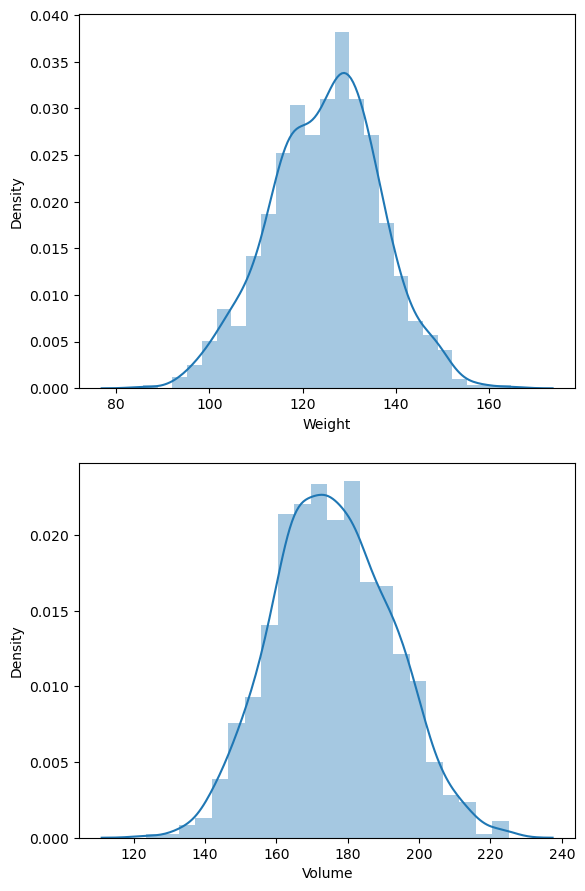

In [16]:
fig, axes = plt.subplots(2, figsize=(6.4, 10.7))
sb.distplot(fruit[fruit["Type"]=="Apple"]["Weight"], ax=axes[0])
sb.distplot(fruit[fruit["Type"]=="Apple"]["Volume"], ax=axes[1])
plt.show()